<a href="https://colab.research.google.com/github/nayoonchoi00/algo2024_PBL_indi/blob/main/PBL_Indi_last_plz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PBL(1): Individual Project Work

In [2373]:
project = "housingprice"
username = "22011271@sju.ac.kr"
password = "0128"

In [2374]:
import os
import urllib.request

if not os.path.exists("competition.py"):
    url = "https://raw.githubusercontent.com/agtechresearch/LectureAlgorithm/main/competition/competition.py"
    filename = "competition.py"
    urllib.request.urlretrieve(url, filename)

In [2375]:
import competition

# 파일 다운로드
competition.download_competition_files(project)

100%|██████████| 141k/141k [00:00<00:00, 29.2MiB/s]


In [2376]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# 경고 무시
warnings.filterwarnings("ignore")

# Data 경로 설정
DATA_DIR = "data"

In [2377]:
# 학습에 사용할 과거 주택매매 data set 로드 (dataset.csv)
dataset = pd.read_csv(os.path.join(DATA_DIR, "dataset.csv"))

# problem set 로드 (problem.csv)
problemset = pd.read_csv(os.path.join(DATA_DIR, "problem.csv"))

In [2378]:
# 변수가 24개가 있으므로, 모든 변수를 출력하려면 다음과 같이 설정해야 함
pd.options.display.max_columns = 30

#**데이터 전처리**

##EDA

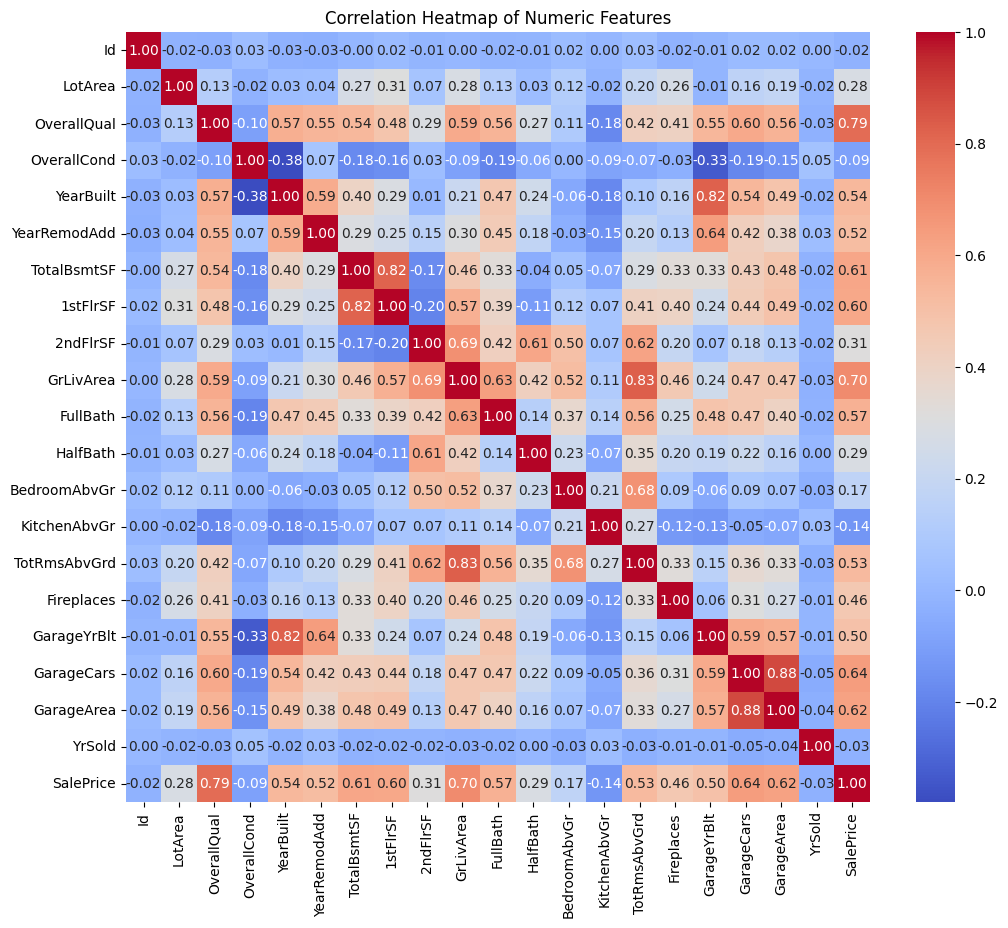

In [2379]:
import seaborn as sns
import matplotlib.pyplot as plt

# 수치형 열만 선택
numeric_columns = dataset.select_dtypes(include=['int64', 'float64'])

# 수치형 열 간의 상관 관계 행렬 계산
correlation_matrix = numeric_columns.corr()

# 히트맵 그리기
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

# OverallQual, GrLivArea 와 SalePrice 간 높은 상관관계

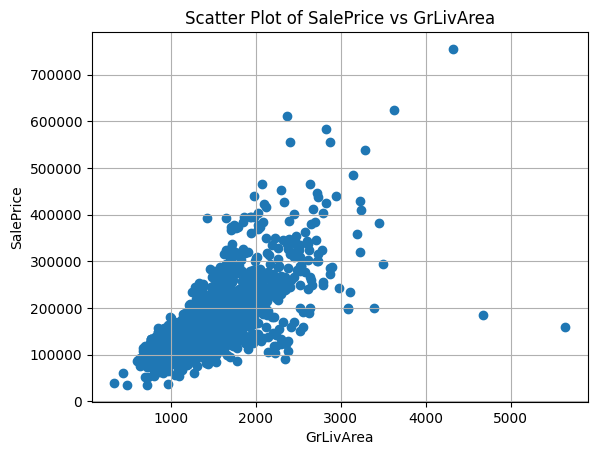

In [2380]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

fig, ax = plt.subplots()
ax.scatter(x = dataset['GrLivArea'], y= dataset['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('GrLivArea')
plt.title('Scatter Plot of SalePrice vs GrLivArea')
plt.grid()
plt.show()

# 처리해야 할 이상치 값을 확인할 수 있음.

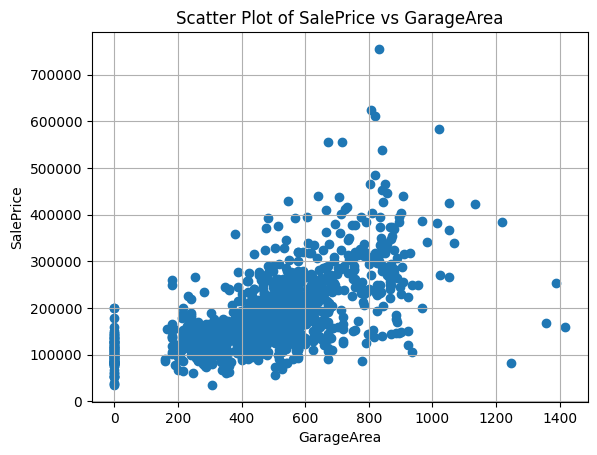

In [2381]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

fig, ax = plt.subplots()
ax.scatter(x = dataset['GarageArea'], y= dataset['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('GarageArea')
plt.title('Scatter Plot of SalePrice vs GarageArea')
plt.grid()
plt.show()

# 처리해야 할 이상치 값을 확인할 수 있음.

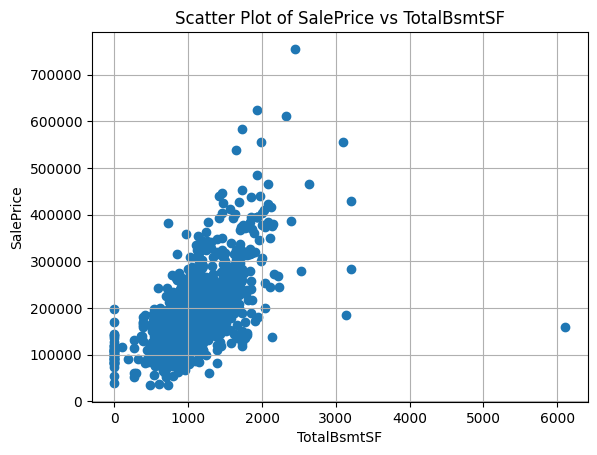

In [2382]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

fig, ax = plt.subplots()
ax.scatter(x = dataset['TotalBsmtSF'], y= dataset['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('TotalBsmtSF')
plt.title('Scatter Plot of SalePrice vs TotalBsmtSF')
plt.grid()
plt.show()

# 처리해야 할 이상치 값을 확인할 수 있음.

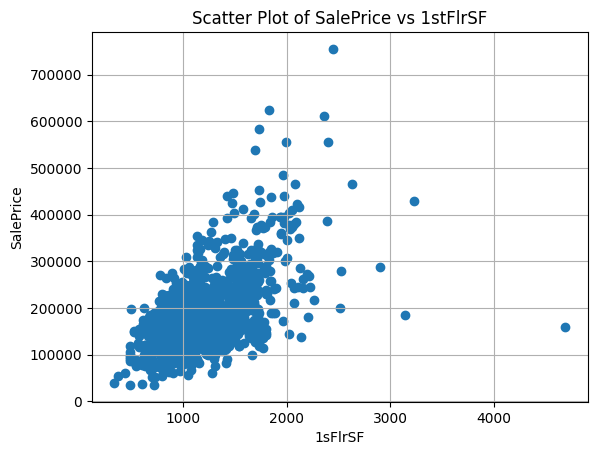

In [2383]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

fig, ax = plt.subplots()
ax.scatter(x = dataset['1stFlrSF'], y= dataset['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('1sFlrSF')
plt.title('Scatter Plot of SalePrice vs 1stFlrSF')
plt.grid()
plt.show()

# 처리해야 할 이상치 값을 확인할 수 있음.

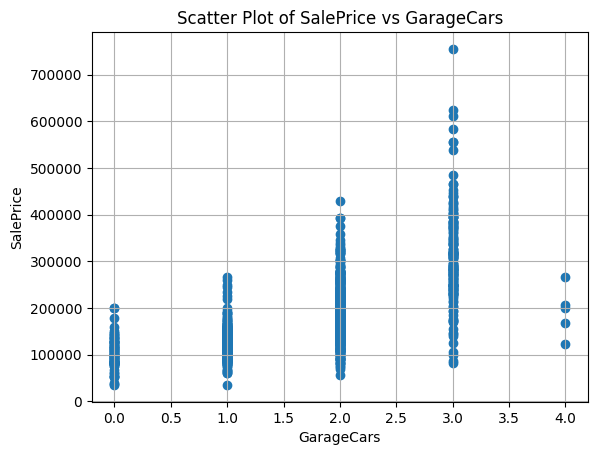

In [2384]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

fig, ax = plt.subplots()
ax.scatter(x = dataset['GarageCars'], y= dataset['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('GarageCars')
plt.title('Scatter Plot of SalePrice vs GarageCars')
plt.grid()
plt.show()

# 처리해야 할 이상치 값을 확인할 수 있음.

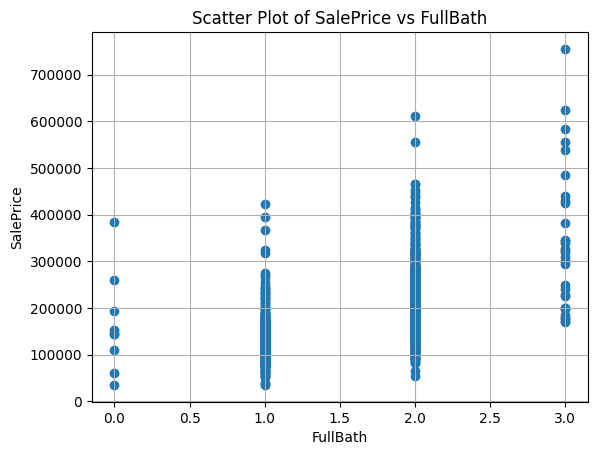

In [2385]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

fig, ax = plt.subplots()
ax.scatter(x = dataset['FullBath'], y= dataset['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('FullBath')
plt.title('Scatter Plot of SalePrice vs FullBath')
plt.grid()
plt.show()

# 처리해야 할 이상치 값을 확인할 수 있음.

## 이상값 제거

In [2386]:
dataset = dataset.drop(dataset[(dataset['GrLivArea']>4000) & (dataset['SalePrice']<300000)].index)
dataset = dataset.drop(dataset[(dataset['GarageArea']>1200) & (dataset['SalePrice']<300000)].index)
dataset = dataset.drop(dataset[(dataset['TotalBsmtSF']>3000) & (dataset['SalePrice']<300000)].index)
dataset = dataset.drop(dataset[(dataset['1stFlrSF']>2700) & (dataset['SalePrice']<300000)].index)

dataset = dataset.drop(dataset[(dataset['GarageCars']>3.5) & (dataset['SalePrice']<300000)].index)

'''
dataset = dataset.drop(dataset[(dataset['GarageArea']<150) & (dataset['SalePrice']<300000)].index)
'''

"\ndataset = dataset.drop(dataset[(dataset['GarageArea']<150) & (dataset['SalePrice']<300000)].index)\n"

In [2387]:
'''
# GrLivArea 이상치 처리
dataset['GrLivArea'] = dataset['GrLivArea'].clip(upper=4000)

# GarageArea 이상치 처리
dataset['GarageArea'] = dataset['GarageArea'].clip(upper=1200)

# TotalBsmtSF 이상치 처리
dataset['TotalBsmtSF'] = dataset['TotalBsmtSF'].clip(upper=3000)

# 1stFlrSF 이상치 처리
dataset['1stFlrSF'] = dataset['1stFlrSF'].clip(upper=2700)
'''

"\n# GrLivArea 이상치 처리\ndataset['GrLivArea'] = dataset['GrLivArea'].clip(upper=4000)\n\n# GarageArea 이상치 처리\ndataset['GarageArea'] = dataset['GarageArea'].clip(upper=1200)\n\n# TotalBsmtSF 이상치 처리\ndataset['TotalBsmtSF'] = dataset['TotalBsmtSF'].clip(upper=3000)\n\n# 1stFlrSF 이상치 처리\ndataset['1stFlrSF'] = dataset['1stFlrSF'].clip(upper=2700)\n"

##새로운 feature 생성, 삭제

In [2388]:
# 'id' 열 삭제
dataset.drop('Id', axis=1, inplace=True)
problemset.drop('Id', axis=1, inplace=True)

# GarageType 열 삭제
dataset.drop('GarageType', axis=1, inplace=True)
problemset.drop('GarageType', axis=1, inplace=True)

In [2389]:
# HouseAge 특성 생성
dataset['HouseAge'] = dataset['YrSold'] - dataset['YearBuilt']
problemset['HouseAge'] = problemset['YrSold'] - problemset['YearBuilt']

# RemodelAge 특성 생성
dataset['RemodelAge'] = dataset['YrSold'] - dataset['YearRemodAdd']
problemset['RemodelAge'] = problemset['YrSold'] - problemset['YearRemodAdd']

# OverallQuality 특성 생성
dataset['OverallQuality'] = (dataset['OverallQual'] + dataset['OverallCond']) / 2
problemset['OverallQuality'] = (problemset['OverallQual'] + problemset['OverallCond']) / 2

# Has2ndfloor 특성 생성
dataset['Has2ndfloor'] = dataset['2ndFlrSF'].apply(lambda x:1 if x > 0 else 0)
problemset['Has2ndfloor'] = problemset['2ndFlrSF'].apply(lambda x:1 if x > 0 else 0)

# HasFirePlace 특성 생성
dataset['HasFirePlace'] = dataset['Fireplaces'].apply(lambda x:1 if x > 0 else 0)
problemset['HasFirePlace'] = problemset['Fireplaces'].apply(lambda x:1 if x > 0 else 0)

# HasGarage 특성 생성
dataset['HasGarage'] = dataset['GarageArea'].apply(lambda x:1 if x > 0 else 0)
problemset['HasGarage'] = problemset['GarageArea'].apply(lambda x:1 if x > 0 else 0)

In [2390]:
'''
# YrSold 열 삭제
dataset.drop('YrSold', axis=1, inplace=True)
problemset.drop('YrSold', axis=1, inplace=True)

# GaraOverallCondge 열 삭제
dataset.drop('OverallCond', axis=1, inplace=True)
problemset.drop('OverallCond', axis=1, inplace=True)
'''

"\n# YrSold 열 삭제\ndataset.drop('YrSold', axis=1, inplace=True)\nproblemset.drop('YrSold', axis=1, inplace=True)\n\n# GaraOverallCondge 열 삭제\ndataset.drop('OverallCond', axis=1, inplace=True)\nproblemset.drop('OverallCond', axis=1, inplace=True)\n"

In [2391]:
import pandas as pd

# 결측치를 0으로 대체
dataset = dataset.fillna(0)

##더미변수 변환

In [2392]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1329 entries, 0 to 1339
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   LotArea         1329 non-null   int64  
 1   Street          1329 non-null   object 
 2   LotConfig       1329 non-null   object 
 3   OverallQual     1329 non-null   int64  
 4   OverallCond     1329 non-null   int64  
 5   YearBuilt       1329 non-null   int64  
 6   YearRemodAdd    1329 non-null   int64  
 7   TotalBsmtSF     1329 non-null   int64  
 8   1stFlrSF        1329 non-null   int64  
 9   2ndFlrSF        1329 non-null   int64  
 10  GrLivArea       1329 non-null   int64  
 11  FullBath        1329 non-null   int64  
 12  HalfBath        1329 non-null   int64  
 13  BedroomAbvGr    1329 non-null   int64  
 14  KitchenAbvGr    1329 non-null   int64  
 15  TotRmsAbvGrd    1329 non-null   int64  
 16  Fireplaces      1329 non-null   int64  
 17  GarageYrBlt     1329 non-null   float6

In [2393]:
# dataset 더미변수 변환
# 첫 번째 object type 열 선택
categorical_column1 = 'Street'
dummies1 = pd.get_dummies(dataset[categorical_column1], prefix=categorical_column1)

# 두 번째 object type 열 선택
categorical_column2 = 'LotConfig'
dummies2 = pd.get_dummies(dataset[categorical_column2], prefix=categorical_column2)

# 기존 데이터프레임과 더미 변수를 합치기
dataset = pd.concat([dataset, dummies1, dummies2], axis=1)

# 더미 변수의 True/False를 1/0으로 변환
dataset.replace({True: 1, False: 0}, inplace=True)

# 원래 열 삭제
dataset.drop([categorical_column1, categorical_column2], axis=1, inplace=True)

In [2394]:
# problemset 더미변수 변환
# 첫 번째 object type 열 선택
categorical_column11 = 'Street'
dummies11 = pd.get_dummies(problemset[categorical_column11], prefix=categorical_column11)

# 두 번째 object type 열 선택
categorical_column22 = 'LotConfig'
dummies22 = pd.get_dummies(problemset[categorical_column22], prefix=categorical_column22)

# 기존 데이터프레임과 더미 변수를 합치기
problemset = pd.concat([problemset, dummies11, dummies22], axis=1)

# 더미 변수의 True/False를 1/0으로 변환
problemset.replace({True: 1, False: 0}, inplace=True)

# 원래 열 삭제
problemset.drop([categorical_column11, categorical_column22], axis=1, inplace=True)

## 정규화

In [2395]:
'''
import matplotlib.pyplot as plt
from scipy import stats

# Box-Cox 변환 적용할 변수 선택
# Box-Cox 변환은 데이터의 분포를 정규 분포에 가깝게 만들기 위해 사용됨

transformed_SalePrice, lambda_value = stats.boxcox(dataset['SalePrice'])
dataset['SalePrice'] = transformed_SalePrice
'''

"\nimport matplotlib.pyplot as plt\nfrom scipy import stats\n\n# Box-Cox 변환 적용할 변수 선택\n# Box-Cox 변환은 데이터의 분포를 정규 분포에 가깝게 만들기 위해 사용됨\n\ntransformed_SalePrice, lambda_value = stats.boxcox(dataset['SalePrice'])\ndataset['SalePrice'] = transformed_SalePrice\n"

In [2396]:
'''
import pandas as pd

# saleprice와의 상관관계 계산
correlation_with_saleprice = dataset.corr()['SalePrice'].sort_values(ascending=False)
print(correlation_with_saleprice)

strong_corr = ['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageCars', 'GarageArea', '1stFlrSF', 'OverallQuality', 'FullBath', 'YearBuilt', 'TotRmsAbvGrd', 'YearRemodAdd', 'HouseAge']
'''

"\nimport pandas as pd\n\n# saleprice와의 상관관계 계산\ncorrelation_with_saleprice = dataset.corr()['SalePrice'].sort_values(ascending=False)\nprint(correlation_with_saleprice)\n\nstrong_corr = ['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageCars', 'GarageArea', '1stFlrSF', 'OverallQuality', 'FullBath', 'YearBuilt', 'TotRmsAbvGrd', 'YearRemodAdd', 'HouseAge']\n"

In [2397]:
'''
import pandas as pd
from scipy.stats import skew

# 숫자형 특성 선택
numeric_features = dataset.dtypes[dataset.dtypes != "object"].index

# 왜도 계산
# 왜도(Skewness)는 확률 분포의 비대칭성을 측정하는 지표. 데이터의 분포가 얼마나 비대칭인지를 나타내며, 주로 정규 분포와 비교됨. 0에 가까울수록 데이터의 분포가 대칭적
skewness = dataset[numeric_features].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)

print("특성의 왜도:")
print(skewness)
'''

'\nimport pandas as pd\nfrom scipy.stats import skew\n\n# 숫자형 특성 선택\nnumeric_features = dataset.dtypes[dataset.dtypes != "object"].index\n\n# 왜도 계산\n# 왜도(Skewness)는 확률 분포의 비대칭성을 측정하는 지표. 데이터의 분포가 얼마나 비대칭인지를 나타내며, 주로 정규 분포와 비교됨. 0에 가까울수록 데이터의 분포가 대칭적\nskewness = dataset[numeric_features].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)\n\nprint("특성의 왜도:")\nprint(skewness)\n'

In [2398]:
'''
# 왜도의 절댓값이 1 이상인 특성 선택
skew_up = skewness[abs(skewness) >= 1].index.tolist()

print("왜도의 절댓값이 1 이상인 특성:")
skew_up
'''

'\n# 왜도의 절댓값이 1 이상인 특성 선택\nskew_up = skewness[abs(skewness) >= 1].index.tolist()\n\nprint("왜도의 절댓값이 1 이상인 특성:")\nskew_up\n'

In [2399]:
'''
import numpy as np

# 왜도가 1 이상인 특성에 로그 변환 적용
skew_up = skewness[skewness > 1].index
for feature in skew_up:
    dataset[feature] = np.log1p(dataset[feature])
'''

'\nimport numpy as np\n\n# 왜도가 1 이상인 특성에 로그 변환 적용\nskew_up = skewness[skewness > 1].index\nfor feature in skew_up:\n    dataset[feature] = np.log1p(dataset[feature])\n'

In [2400]:
'''
import pandas as pd
from scipy.stats import boxcox
from numpy import log1p

skew_up = ['LotArea', 'KitchenAbvGr', 'GrLivArea', '1stFlrSF', '2ndFlrSF', 'HalfBath', 'TotRmsAbvGrd', 'Fireplaces', 'OverallCond', 'HouseAge', 'YearBuilt', 'GarageYrBlt','HasGarage']

# skew_up에 있는 특성들을 boxcox를 이용해 정규화
for feature in skew_up:
    # 0 값을 0.01로 대체하고 boxcox 변환 수행
    transformed, lambda_val = boxcox(dataset[feature] + 0.01)
    # 변환된 값을 할당
    dataset[feature] = transformed

# 변환된 값을 다시 원래 스케일로 변환 (옵션)
# 예를 들어, 변환된 값을 다시 원래 스케일로 되돌리고자 할 때
# inv_boxcox_val = inv_boxcox(transformed, lambda_val)
'''

"\nimport pandas as pd\nfrom scipy.stats import boxcox\nfrom numpy import log1p\n\nskew_up = ['LotArea', 'KitchenAbvGr', 'GrLivArea', '1stFlrSF', '2ndFlrSF', 'HalfBath', 'TotRmsAbvGrd', 'Fireplaces', 'OverallCond', 'HouseAge', 'YearBuilt', 'GarageYrBlt','HasGarage']\n\n# skew_up에 있는 특성들을 boxcox를 이용해 정규화\nfor feature in skew_up:\n    # 0 값을 0.01로 대체하고 boxcox 변환 수행\n    transformed, lambda_val = boxcox(dataset[feature] + 0.01)\n    # 변환된 값을 할당\n    dataset[feature] = transformed\n\n# 변환된 값을 다시 원래 스케일로 변환 (옵션)\n# 예를 들어, 변환된 값을 다시 원래 스케일로 되돌리고자 할 때\n# inv_boxcox_val = inv_boxcox(transformed, lambda_val)\n"

#**표준 스케일러**

In [2401]:
'''
column_names = ['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'YrSold', 'SalePrice', 'HouseAge', 'RemodelAge', 'OverallQuality', 'Street_Grvl', 'Street_Pave', 'LotConfig_Corner', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside']

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 데이터셋을 DataFrame으로 변환
dataset_df = pd.DataFrame(dataset, columns=column_names)

# SalePrice 열을 Y로 지정
Y_GB = dataset_df["SalePrice"]

# SalePrice 열을 제외한 나머지 열을 X로 지정
X_GB = dataset_df.drop("SalePrice", axis=1)

# 표준 스케일러 객체 생성
scaler = StandardScaler()

# 주택 가격을 제외한 나머지 특성에 스케일러를 적용하여 스케일링
scaled_features = scaler.fit_transform(X_GB)

# 스케일링된 특성 데이터를 DataFrame으로 변환
scaled_features_df = pd.DataFrame(scaled_features, columns=X_GB.columns)

# 스케일링된 데이터셋에 주택 가격 열 추가
scaled_dataset_df = pd.concat([scaled_features_df, Y_GB], axis=1)

# 학습 데이터를 80%의 학습 데이터(train)와 20%의 검증 데이터(test)로 나눔
x_train_GB, x_test_GB, y_train_GB, y_test_GB = train_test_split(scaled_dataset_df.drop("SalePrice", axis=1), scaled_dataset_df["SalePrice"], test_size=0.2)
'''

'\ncolumn_names = [\'LotArea\', \'OverallQual\', \'OverallCond\', \'YearBuilt\', \'YearRemodAdd\', \'TotalBsmtSF\', \'1stFlrSF\', \'2ndFlrSF\', \'GrLivArea\', \'FullBath\', \'HalfBath\', \'BedroomAbvGr\', \'KitchenAbvGr\', \'TotRmsAbvGrd\', \'Fireplaces\', \'GarageYrBlt\', \'GarageCars\', \'GarageArea\', \'YrSold\', \'SalePrice\', \'HouseAge\', \'RemodelAge\', \'OverallQuality\', \'Street_Grvl\', \'Street_Pave\', \'LotConfig_Corner\', \'LotConfig_CulDSac\', \'LotConfig_FR2\', \'LotConfig_FR3\', \'LotConfig_Inside\']\n\nimport pandas as pd\nfrom sklearn.preprocessing import StandardScaler\nfrom sklearn.model_selection import train_test_split\n\n# 데이터셋을 DataFrame으로 변환\ndataset_df = pd.DataFrame(dataset, columns=column_names)\n\n# SalePrice 열을 Y로 지정\nY_GB = dataset_df["SalePrice"]\n\n# SalePrice 열을 제외한 나머지 열을 X로 지정\nX_GB = dataset_df.drop("SalePrice", axis=1)\n\n# 표준 스케일러 객체 생성\nscaler = StandardScaler()\n\n# 주택 가격을 제외한 나머지 특성에 스케일러를 적용하여 스케일링\nscaled_features = scaler.fit_transform(X_GB)

In [2402]:
'''
from sklearn.ensemble import GradientBoostingRegressor

# Gradient Boosting 모델 생성 및 학습
model_GB = GradientBoostingRegressor()
model_GB.fit(x_train_GB, y_train_GB)

# 테스트 데이터에 대한 예측 수행
y_pred_GB = model_GB.predict(x_test_GB)

# train 데이터와 test 데이터에 대한 예측값을 구하고 RMSE 값을 계산
from sklearn.metrics import mean_squared_error

train_pred_GB = model_GB.predict(x_train_GB)
test_pred_GB = model_GB.predict(x_test_GB)

print("Train RMSE :", mean_squared_error(y_train_GB, train_pred_GB) ** 0.5)
print("Test RMSE :", mean_squared_error(y_test_GB, test_pred_GB) ** 0.5)
'''

'\nfrom sklearn.ensemble import GradientBoostingRegressor\n\n# Gradient Boosting 모델 생성 및 학습\nmodel_GB = GradientBoostingRegressor()\nmodel_GB.fit(x_train_GB, y_train_GB)\n\n# 테스트 데이터에 대한 예측 수행\ny_pred_GB = model_GB.predict(x_test_GB)\n\n# train 데이터와 test 데이터에 대한 예측값을 구하고 RMSE 값을 계산\nfrom sklearn.metrics import mean_squared_error\n\ntrain_pred_GB = model_GB.predict(x_train_GB)\ntest_pred_GB = model_GB.predict(x_test_GB)\n\nprint("Train RMSE :", mean_squared_error(y_train_GB, train_pred_GB) ** 0.5)\nprint("Test RMSE :", mean_squared_error(y_test_GB, test_pred_GB) ** 0.5)\n'

#**모델학습**

#**RandomForest**

In [2403]:
# 학습 데이터의 SalePrice 열을 제외한 나머지 열을 X로 지정, SalePrice 열을 Y로 지정
X_RF = dataset.drop("SalePrice", axis=1)
Y_RF = dataset["SalePrice"]

# 모델 학습을 위해 학습 데이터를 80%의 학습 데이터(train)와 20%의 검증 데이터(test)로 나눔
from sklearn.model_selection import train_test_split

x_train_RF, x_test_RF, y_train_RF, y_test_RF = train_test_split(X_RF, Y_RF, test_size=0.2)

In [2404]:
# 랜덤 포레스트 모델을 사용하여 학습
from sklearn.ensemble import RandomForestRegressor

model_RF = RandomForestRegressor()
model_RF.fit(x_train_RF, y_train_RF)

RandomForestRegressor()

In [2405]:
# train 데이터와 test 데이터에 대한 예측값을 구하고 RMSE 값을 계산
from sklearn.metrics import mean_squared_error

train_pred_RF = model_RF.predict(x_train_RF)
test_pred_RF = model_RF.predict(x_test_RF)

print("Train RMSE :", mean_squared_error(y_train_RF, train_pred_RF) ** 0.5)
print("Test RMSE :", mean_squared_error(y_test_RF, test_pred_RF) ** 0.5)

Train RMSE : 10279.705603137283
Test RMSE : 31319.774669157352


In [2406]:
'''
# 문제 데이터(problem data)에 대한 예측값을 구함
problem_pred = model_RF.predict(problemset)

# 리더보드 서버 제출을 위한 파일 생성
submission = pd.read_csv(os.path.join(DATA_DIR, "submission.csv"))
submission["SalePrice"] = problem_pred

# 예측 결과 화면에 출력 후 제출
display(submission)
competition.submit(project, username, password, submission)
'''

'\n# 문제 데이터(problem data)에 대한 예측값을 구함\nproblem_pred = model_RF.predict(problemset)\n\n# 리더보드 서버 제출을 위한 파일 생성\nsubmission = pd.read_csv(os.path.join(DATA_DIR, "submission.csv"))\nsubmission["SalePrice"] = problem_pred\n\n# 예측 결과 화면에 출력 후 제출\ndisplay(submission)\ncompetition.submit(project, username, password, submission)\n'

#**XGBoost**

In [2407]:
# 학습 데이터의 SalePrice 열을 제외한 나머지 열을 X로 지정, SalePrice 열을 Y로 지정
X_XGB = dataset.drop("SalePrice", axis=1)
Y_XGB = dataset["SalePrice"]

# 모델 학습을 위해 학습 데이터를 80%의 학습 데이터(train)와 20%의 검증 데이터(test)로 나눔
from sklearn.model_selection import train_test_split

x_train_XGB, x_test_XGB, y_train_XGB, y_test_XGB = train_test_split(X_XGB, Y_XGB, test_size=0.2)

In [2408]:
# XGBoost 모델을 사용하여 학습
import xgboost as xgb

# XGBoost 모델 생성 및 학습
model_XGB = xgb.XGBRegressor()
model_XGB.fit(x_train_XGB, y_train_XGB)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [2409]:
# train 데이터와 test 데이터에 대한 예측값을 구하고 RMSE 값을 계산
from sklearn.metrics import mean_squared_error

train_pred_XGB = model_XGB.predict(x_train_XGB)
test_pred_XGB = model_XGB.predict(x_test_XGB)

print("Train RMSE :", mean_squared_error(y_train_XGB, train_pred_XGB) ** 0.5)
print("Test RMSE :", mean_squared_error(y_test_XGB, test_pred_XGB) ** 0.5)

Train RMSE : 1381.0549646972765
Test RMSE : 26181.799391872984


# **LightGBM**

In [2410]:
# 학습 데이터의 SalePrice 열을 제외한 나머지 열을 X로 지정, SalePrice 열을 Y로 지정
X_LGB = dataset.drop("SalePrice", axis=1)
Y_LGB = dataset["SalePrice"]

# 모델 학습을 위해 학습 데이터를 80%의 학습 데이터(train)와 20%의 검증 데이터(test)로 나눔
from sklearn.model_selection import train_test_split

x_train_LGB, x_test_LGB, y_train_LGB, y_test_LGB = train_test_split(X_LGB, Y_LGB, test_size=0.2)

In [2411]:
import lightgbm as lgb

# LightGBM 데이터셋으로 변환
train_data_LGB = lgb.Dataset(x_train_LGB, label=y_train_LGB)
test_data_LGB = lgb.Dataset(x_test_LGB, label=y_test_LGB)

# LightGBM 모델 설정
params = {'objective': 'regression', 'metric': 'rmse'}
num_round = 1000

# LightGBM 모델 학습
model_LGB = lgb.train(params, train_data_LGB, num_round, valid_sets=[test_data_LGB])

# 테스트 데이터에 대한 예측 수행
y_pred_LGB = model_LGB.predict(x_test_LGB, num_iteration = model_LGB.best_iteration)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000217 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1922
[LightGBM] [Info] Number of data points in the train set: 1063, number of used features: 29
[LightGBM] [Info] Start training from score 179771.541863


In [2412]:
# train 데이터와 test 데이터에 대한 예측값을 구하고 RMSE 값을 계산
from sklearn.metrics import mean_squared_error

train_pred_LGB = model_LGB.predict(x_train_LGB)
test_pred_LGB = model_LGB.predict(x_test_LGB)

print("Train RMSE :", mean_squared_error(y_train_LGB, train_pred_LGB) ** 0.5)
print("Test RMSE :", mean_squared_error(y_test_LGB, test_pred_LGB) ** 0.5)

Train RMSE : 839.1712429265503
Test RMSE : 27419.93820195818


In [2413]:
'''
# 문제 데이터(problem data)에 대한 예측값을 구함
problem_pred = model_LGB.predict(problemset)

# 리더보드 서버 제출을 위한 파일 생성
submission = pd.read_csv(os.path.join(DATA_DIR, "submission.csv"))
submission["SalePrice"] = problem_pred

# 예측 결과 화면에 출력 후 제출
display(submission)
competition.submit(project, username, password, submission)
'''

'\n# 문제 데이터(problem data)에 대한 예측값을 구함\nproblem_pred = model_LGB.predict(problemset)\n\n# 리더보드 서버 제출을 위한 파일 생성\nsubmission = pd.read_csv(os.path.join(DATA_DIR, "submission.csv"))\nsubmission["SalePrice"] = problem_pred\n\n# 예측 결과 화면에 출력 후 제출\ndisplay(submission)\ncompetition.submit(project, username, password, submission)\n'

# **앙상블 학습**

# **Gradient Boosting**

In [2414]:
# 학습 데이터의 SalePrice 열을 제외한 나머지 열을 X로 지정, SalePrice 열을 Y로 지정
X_GB = dataset.drop("SalePrice", axis=1)
Y_GB = dataset["SalePrice"]

# 모델 학습을 위해 학습 데이터를 80%의 학습 데이터(train)와 20%의 검증 데이터(test)로 나눔
from sklearn.model_selection import train_test_split

x_train_GB, x_test_GB, y_train_GB, y_test_GB = train_test_split(X_GB, Y_GB, test_size=0.2)

In [2415]:
from sklearn.ensemble import GradientBoostingRegressor

# Gradient Boosting 모델 생성 및 학습
model_GB = GradientBoostingRegressor()
model_GB.fit(x_train_GB, y_train_GB)

# 테스트 데이터에 대한 예측 수행
y_pred_GB = model_GB.predict(x_test_GB)

In [2416]:
# train 데이터와 test 데이터에 대한 예측값을 구하고 RMSE 값을 계산
from sklearn.metrics import mean_squared_error

train_pred_GB = model_GB.predict(x_train_GB)
test_pred_GB = model_GB.predict(x_test_GB)

print("Train RMSE :", mean_squared_error(y_train_GB, train_pred_GB) ** 0.5)
print("Test RMSE :", mean_squared_error(y_test_GB, test_pred_GB) ** 0.5)

Train RMSE : 15697.692969485986
Test RMSE : 24726.860423195012


In [2417]:

# 문제 데이터(problem data)에 대한 예측값을 구함
problem_pred = model_GB.predict(problemset)

# 리더보드 서버 제출을 위한 파일 생성
submission = pd.read_csv(os.path.join(DATA_DIR, "submission.csv"))
submission["SalePrice"] = problem_pred

# 예측 결과 화면에 출력 후 제출
display(submission)
competition.submit(project, username, password, submission)


,Id,SalePrice
0,1341,128455.900893
1,1342,132166.723384
2,1343,156109.480307
3,1344,137566.145269
4,1345,107535.551295
...,...,...
125,1466,281973.389480
126,1467,190728.582887
127,1468,74638.382131
128,1469,74187.253841


아이디:  22011271@sju.ac.kr
파일명:  submissions/20240515-084722-submission.csv
[제출에 성공하였습니다]
제출 결과: 22786.42753223928


##LightGBM + GradientBoosting

In [2418]:
# 학습 데이터의 SalePrice 열을 제외한 나머지 열을 X로 지정, SalePrice 열을 Y로 지정
X_L_GB = dataset.drop("SalePrice", axis=1)
Y_L_GB = dataset["SalePrice"]

# 모델 학습을 위해 학습 데이터를 80%의 학습 데이터(train)와 20%의 검증 데이터(test)로 나눔
from sklearn.model_selection import train_test_split

x_train_L_GB, x_test_L_GB, y_train_L_GB, y_test_L_GB = train_test_split(X_L_GB, Y_L_GB, test_size=0.2)

from sklearn.ensemble import GradientBoostingRegressor
import lightgbm as lgb

# LightGBM 데이터셋으로 변환
train_data_LGB = lgb.Dataset(x_train_LGB, label=y_train_LGB)
test_data_LGB = lgb.Dataset(x_test_LGB, label=y_test_LGB)

# LightGBM 모델 설정
params = {'objective': 'regression', 'metric': 'rmse'}
num_round = 1000

# LightGBM 모델 학습
model_LGB = lgb.train(params, train_data_LGB, num_round, valid_sets=[test_data_LGB])

# 테스트 데이터에 대한 예측 수행
y_pred_LGB = model_LGB.predict(x_test_LGB, num_iteration = model_LGB.best_iteration)


# 그래디언트 부스팅 모델 생성 및 학습
gb_model = GradientBoostingRegressor()
gb_model.fit(x_train_RFGB, y_train_RFGB)

# 두 모델의 예측 수행
y_pred_LGB = model_LGB.predict(x_test_L_GB)
gb_pred = gb_model.predict(x_test_L_GB)

# 예측값의 평균을 구하여 앙상블 예측값 생성
ensemble_pred_L_GB = (y_pred_LGB + gb_pred) / 2

# 앙상블 모델 평가 (RMSE 계산)
from sklearn.metrics import mean_squared_error

rmse_L_GB = mean_squared_error(y_test_L_GB, ensemble_pred_L_GB, squared=False)
print("Ensemble RMSE:", rmse_L_GB)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000228 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1922
[LightGBM] [Info] Number of data points in the train set: 1063, number of used features: 29
[LightGBM] [Info] Start training from score 179771.541863
Ensemble RMSE: 11773.760142261595


In [2419]:
'''
# 문제 데이터(problem data)에 대한 예측값을 구함
problem_pred_L = model_LGB.predict(problemset)
problem_pred_gb = gb_model.predict(problemset)

# 예측값의 평균을 구하여 앙상블 예측값 생성
ensemble_pred_L_GB = (problem_pred_L + problem_pred_gb) / 2

# 리더보드 서버 제출을 위한 파일 생성
submission = pd.read_csv(os.path.join(DATA_DIR, "submission.csv"))
submission["SalePrice"] = ensemble_pred_L_GB

# 예측 결과 화면에 출력 후 제출
display(submission)
competition.submit(project, username, password, submission)
'''

'\n# 문제 데이터(problem data)에 대한 예측값을 구함\nproblem_pred_L = model_LGB.predict(problemset)\nproblem_pred_gb = gb_model.predict(problemset)\n\n# 예측값의 평균을 구하여 앙상블 예측값 생성\nensemble_pred_L_GB = (problem_pred_L + problem_pred_gb) / 2\n\n# 리더보드 서버 제출을 위한 파일 생성\nsubmission = pd.read_csv(os.path.join(DATA_DIR, "submission.csv"))\nsubmission["SalePrice"] = ensemble_pred_L_GB\n\n# 예측 결과 화면에 출력 후 제출\ndisplay(submission)\ncompetition.submit(project, username, password, submission)\n'

# **Random Forest + Gradient Boosting**

In [2420]:
# 학습 데이터의 SalePrice 열을 제외한 나머지 열을 X로 지정, SalePrice 열을 Y로 지정
X_RFGB = dataset.drop("SalePrice", axis=1)
Y_RFGB = dataset["SalePrice"]

# 모델 학습을 위해 학습 데이터를 80%의 학습 데이터(train)와 20%의 검증 데이터(test)로 나눔
from sklearn.model_selection import train_test_split

x_train_RFGB, x_test_RFGB, y_train_RFGB, y_test_RFGB = train_test_split(X_RFGB, Y_RFGB, test_size=0.2)

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# 랜덤 포레스트 모델 생성 및 학습
rf_model = RandomForestRegressor()
rf_model.fit(x_train_RFGB, y_train_RFGB)

# 그래디언트 부스팅 모델 생성 및 학습
gb_model = GradientBoostingRegressor()
gb_model.fit(x_train_RFGB, y_train_RFGB)

# 두 모델의 예측 수행
rf_pred = rf_model.predict(x_test_RFGB)
gb_pred = gb_model.predict(x_test_RFGB)

# 예측값의 평균을 구하여 앙상블 예측값 생성
ensemble_pred_RFGB = (rf_pred + gb_pred) / 2

# 앙상블 모델 평가 (RMSE 계산)
from sklearn.metrics import mean_squared_error

rmse_RFGB = mean_squared_error(y_test_RFGB, ensemble_pred_RFGB, squared=False)
print("Ensemble RMSE:", rmse_RFGB)

Ensemble RMSE: 23063.090813994862


In [2421]:

# 문제 데이터(problem data)에 대한 예측값을 구함
problem_pred_L = rf_model.predict(problemset)
problem_pred_gb = gb_model.predict(problemset)

# 예측값의 평균을 구하여 앙상블 예측값 생성
ensemble_pred_L_GB = (problem_pred_L + problem_pred_gb) / 2

# 리더보드 서버 제출을 위한 파일 생성
submission = pd.read_csv(os.path.join(DATA_DIR, "submission.csv"))
submission["SalePrice"] = ensemble_pred_L_GB

# 예측 결과 화면에 출력 후 제출
display(submission)
competition.submit(project, username, password, submission)


,Id,SalePrice
0,1341,133638.946229
1,1342,128714.866446
2,1343,154721.112651
3,1344,135560.240970
4,1345,105141.187638
...,...,...
125,1466,309584.370687
126,1467,176899.766540
127,1468,78995.161706
128,1469,88947.127265


아이디:  22011271@sju.ac.kr
파일명:  submissions/20240515-084726-submission.csv
[제출에 성공하였습니다]
제출 결과: 26127.969387284196


## XGBoost + LightGBM + GradientBoosting

In [2422]:
import pandas as pd
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# 특성 및 타겟 데이터 설정
X = dataset.drop(columns=["SalePrice"])
y = dataset["SalePrice"]

# 훈련 데이터와 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# LightGBM 모델 학습
lgbm_model = LGBMRegressor()
lgbm_model.fit(X_train, y_train)

# Gradient Boosting 모델 학습
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)

# XGBoost 모델 학습
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

# 각 모델의 예측값 계산
lgbm_pred = lgbm_model.predict(X_test)
gb_pred = gb_model.predict(X_test)
xgb_pred = xgb_model.predict(X_test)

# 앙상블하여 최종 예측값 계산
ensemble_pred = (lgbm_pred + gb_pred + xgb_pred) / 3

# 앙상블 모델의 성능 평가
ensemble_rmse = mean_squared_error(y_test, ensemble_pred, squared=False)
print("Ensemble RMSE:", ensemble_rmse)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000234 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1919
[LightGBM] [Info] Number of data points in the train set: 1063, number of used features: 29
[LightGBM] [Info] Start training from score 179739.765757
Ensemble RMSE: 22346.309428168264


In [2423]:

# 문제 데이터(problem data)에 대한 예측값을 구함
problem_pred_lgb = lgbm_model.predict(problemset)
problem_pred_gb = gb_model.predict(problemset)
problem_pred_xgb = xgb_model.predict(problemset)

# 예측값의 평균을 구하여 앙상블 예측값 생성
ensemble_pred_PRO = (problem_pred_lgb + problem_pred_gb + problem_pred_xgb) / 3

# 리더보드 서버 제출을 위한 파일 생성
submission = pd.read_csv(os.path.join(DATA_DIR, "submission.csv"))
submission["SalePrice"] = ensemble_pred_PRO

# 예측 결과 화면에 출력 후 제출
display(submission)
competition.submit(project, username, password, submission)


,Id,SalePrice
0,1341,129848.650525
1,1342,125620.144151
2,1343,155089.839616
3,1344,133429.513404
4,1345,98741.572136
...,...,...
125,1466,312582.712778
126,1467,173748.215184
127,1468,75934.907122
128,1469,91759.599687


아이디:  22011271@sju.ac.kr
파일명:  submissions/20240515-084727-submission.csv
[제출에 성공하였습니다]
제출 결과: 25364.693472294643


#**하이퍼 파라미터 튜닝**

#**Grid Search**

In [2424]:

from joblib import Parallel, delayed
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# 그리드 서치를 수행할 모델과 하이퍼파라미터 설정
param_grid = {'n_estimators': [50, 150, 200], 'max_depth': [1, 3, 5]}

# 병렬 처리를 사용한 그리드 서치
grid_search = GridSearchCV(model_GB, param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train_GB, y_train_GB)

print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': 3, 'n_estimators': 150}


In [2437]:

# 최적의 하이퍼파라미터 적용

from sklearn.ensemble import GradientBoostingRegressor

# 최적의 하이퍼파라미터를 적용하여 모델 정의
best_model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=3)

# 모델 학습
best_model.fit(x_train_GB, y_train_GB)


GradientBoostingRegressor(n_estimators=200)

In [2438]:

# train 데이터와 test 데이터에 대한 예측값을 구하고 RMSE 값을 계산

from sklearn.metrics import mean_squared_error
import numpy as np

# 학습 데이터에 대한 예측
y_train_pred = best_model.predict(x_train_GB)

# 학습 데이터에 대한 RMSE 계산
train_rmse = np.sqrt(mean_squared_error(y_train_GB, y_train_pred))
print("Train RMSE:", train_rmse)

# 테스트 데이터에 대한 예측
y_test_pred = best_model.predict(x_test_GB)

# 테스트 데이터에 대한 RMSE 계산
test_rmse = np.sqrt(mean_squared_error(y_test_GB, y_test_pred))
print("Test RMSE:", test_rmse)


Train RMSE: 12479.319062087437
Test RMSE: 25221.659501490765


## Problem set 문제에 대한 집값예측 및 리더보드 결과 제출

- 아래 제출 프로세스가 느리다고 중지 후 다시 코드를 여러차례 재실행하는 경우 패널티가 발생할 수 있습니다. (제출 과정에서 제출 횟수 이슈 발생 가능: 하루 최대 200회 까지 가능)
- 제출에 성공할 경우, "제출에 성공하였습니다"의 메세지와 함께 제출 결과 RMSE 가 화면에 출력됩니다.
- 제출결과는 또한 [대회 페이지(리더보드 서버)](https://agtechresearch.pythonanywhere.com/competitions/housingprice/)의 `리더보드` 와 `제출` 탭에서 확인할 수 있습니다.


In [2439]:

# 문제 데이터(problem data)에 대한 예측값을 구함
problem_pred = best_model.predict(problemset)

# 리더보드 서버 제출을 위한 파일 생성
submission = pd.read_csv(os.path.join(DATA_DIR, "submission.csv"))
submission["SalePrice"] = problem_pred

# 예측 결과 화면에 출력 후 제출
display(submission)
competition.submit(project, username, password, submission)


,Id,SalePrice
0,1341,128026.357085
1,1342,129982.027987
2,1343,154354.578610
3,1344,137423.598454
4,1345,109635.626947
...,...,...
125,1466,280534.518849
126,1467,187820.568165
127,1468,70062.417576
128,1469,73211.731344


아이디:  22011271@sju.ac.kr
파일명:  submissions/20240515-085345-submission.csv
[제출에 성공하였습니다]
제출 결과: 21587.253506806966
